<a href="https://colab.research.google.com/github/doricardo/analyse-race/blob/master/code/race-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Resultados Corrida

1.   Importação dos resultados
2.   Limpeza dos dados
3.   Média Swim, Bike, Run por categoria
4.   Melhores Splits Swim, Bike, Run por categoria
5.   Quantidade de Atleats por Categoria
6.   Percentual de Sub10 geral
7.   Percentual de Sub10 por categoria amadora

In [0]:
import numpy as np
import pandas as pd

missing_values = ['--:--:--']
resultados = pd.read_csv('http://doricardo.com/results/2019-uruguay70.3-full.csv', na_values = missing_values, encoding = 'cp1252')
target = '05'
continent = pd.read_csv('http://doricardo.com/dataframe/country-and-continent.csv')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

In [0]:
def limpar_titulo(dataframe):
    dataframe.drop(['Pos'])   
    
def recuperar_media(df, categoria, sexo, atividade):
    tempos = pd.to_datetime(df[(df.Categ == categoria) & (df.Sexo == sexo) & (df[atividade].notnull())][atividade], format= '%H:%M:%S').astype(int).mean()
    media = pd.to_datetime(tempos, format= '%Y-%m-%d %H:%M:%S')
    return pd.to_datetime(media, format= '%Y-%m-%d %H:%M:%S')

In [0]:
# Limpar nome Colunas duplicadas
resultados = resultados[resultados.Pos != 'Pos']

# Incluir nome Colunas
resultados.columns = ['Bib', 'Pos', 'Nome', 'Pais', 'Categ', 'Pos Categ', 'Swim', 'Bike', 'Run', 'Total', 'Status', 'Sexo']

In [0]:
resultados['Finished'] = resultados['Status']

In [0]:
resultados.loc[resultados.Status != 'Finish', 'Finished'] = 'No'
resultados.loc[resultados.Status == 'Finish', 'Finished'] = 'Yes'

In [0]:
finished = resultados[resultados.Status == 'Finish']
unfinished = resultados[resultados.Status != 'Finish']

In [9]:
finished.Swim.fillna(pd.to_datetime(pd.to_datetime(finished['Swim'],format= '%H:%M:%S').astype(int).median(), format= '%Y-%m-%d %H:%M:%S').strftime('%H:%M:%S'), inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
finished.Bike.fillna(pd.to_datetime(pd.to_datetime(finished['Bike'],format= '%H:%M:%S').astype(int).median(), format= '%Y-%m-%d %H:%M:%S').strftime('%H:%M:%S'), inplace=True)

In [0]:
finished.Run.fillna(pd.to_datetime(pd.to_datetime(finished['Run'],format= '%H:%M:%S').astype(int).median(), format= '%Y-%m-%d %H:%M:%S').strftime('%H:%M:%S'), inplace=True)

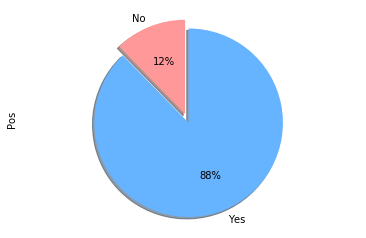

In [12]:
# Percentual de atletas que Concluiram a prova
resultados.groupby(['Finished']).Pos.count().plot.pie(title='', colors=colors, shadow=True, explode=[0.1, 0], startangle=90, autopct='%1.0f%%').axis('equal');

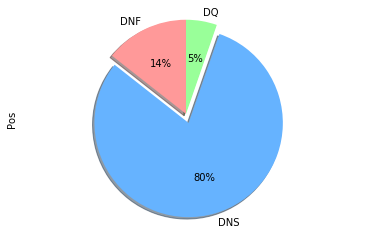

In [0]:
# Distribuição dos motivos de não conlusão da prova
unfinished.groupby(['Status']).Pos.count().plot.pie(title='', colors=colors, shadow=True, explode=[0, 0.1, 0], startangle=90, autopct='%1.0f%%').axis('equal');

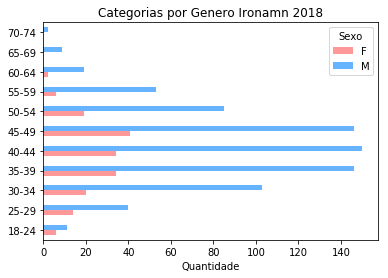

In [0]:
hist = finished.groupby(['Categ','Sexo']).Bib.count().unstack().plot.barh(rot = 0, title='Categorias por Genero Ironamn 2018', color=colors)
hist.set_ylabel('')
hist.set_xlabel('Quantidade');

In [0]:
finished['hora'] = np.where(finished.Total.str.slice(0, 2) < target, 'Abaixo' + target, 'Acima' + target)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


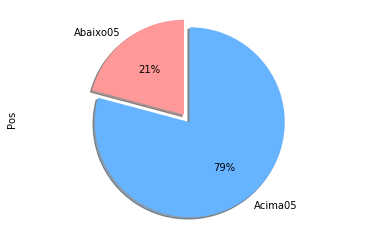

In [0]:
finished.groupby(['hora']).Pos.count().plot.pie(title='', colors=colors, shadow=True, startangle=90, explode=[0.1, 0], autopct='%1.0f%%').axis('equal');

##Converter Colunas

In [0]:
resultados['Swim'] = pd.to_datetime(resultados['Swim'],format= '%H:%M:%S')
resultados['Bike'] = pd.to_datetime(resultados['Bike'],format= '%H:%M:%S')
resultados['Run'] = pd.to_datetime(resultados['Run'],format= '%H:%M:%S')
resultados['Total'] = pd.to_datetime(resultados['Total'],format= '%H:%M:%S')

In [0]:
resultados['nSwim'] = pd.to_datetime(resultados['Swim'],format= '%H:%M:%S').astype(int)
resultados['nBike'] = pd.to_datetime(resultados['Bike'],format= '%H:%M:%S').astype(int)
resultados['nRun'] = pd.to_datetime(resultados['Run'],format= '%H:%M:%S').astype(int)
resultados['nTotal'] = pd.to_datetime(resultados['Total'],format= '%H:%M:%S').astype(int)

##Estatisticas Colunas

In [0]:
media = resultados.groupby(['Categ','Sexo']).mean()

In [0]:
media['Total'] = pd.to_datetime(media['nTotal'], format= '%Y-%m-%d %H:%M:%S')
media['Swim'] = pd.to_datetime(media['nSwim'], format= '%Y-%m-%d %H:%M:%S')
media['Bike'] = pd.to_datetime(media['nBike'], format= '%Y-%m-%d %H:%M:%S')
media['Run'] = pd.to_datetime(media['nRun'], format= '%Y-%m-%d %H:%M:%S')

In [0]:
mais_rapidos = finished.groupby(['Categ','Sexo'])['Swim','Bike','Run','Total'].min()

In [0]:
finished[finished.Total == mais_rapidos.Total]

ValueError: ignored

In [0]:
#mais_rapidos['Total'] = pd.to_datetime(mais_rapidos['nTotal'], format= '%Y-%m-%d %H:%M:%S')
#mais_rapidos['Swim'] = pd.to_datetime(mais_rapidos['nSwim'], format= '%Y-%m-%d %H:%M:%S')
#mais_rapidos['Bike'] = pd.to_datetime(mais_rapidos['nBike'], format= '%Y-%m-%d %H:%M:%S')
#mais_rapidos['Run'] = pd.to_datetime(mais_rapidos['nRun'], format= '%Y-%m-%d %H:%M:%S')

In [0]:
mais_rapidos[['Swim','Bike','Run','Total','Nome']]

Swim      Bike       Run     Total  \
Categ Sexo                                           
18-24 F     00:29:44  02:47:07  01:31:11  04:51:36   
      M     00:25:34  02:15:35  01:18:33  04:04:49   
25-29 F     00:31:21  02:35:52  01:32:26  04:50:27   
      M     00:28:45  02:20:45  01:25:19  04:21:34   
30-34 F     00:37:14  02:31:08  01:35:09  04:56:03   
      M     00:25:12  02:16:13  01:20:07  04:08:39   
35-39 F     00:34:01  02:37:44  01:32:05  04:47:17   
      M     00:28:32  02:15:50  01:17:18  04:11:12   
40-44 F     00:33:06  02:34:43  01:35:01  04:52:04   
      M     00:28:54  02:20:47  01:23:01  04:18:04   
45-49 F     00:34:17  02:38:10  01:33:07  04:53:53   
      M     00:26:00  02:21:17  01:22:12  04:22:35   
50-54 F     00:38:48  02:44:15  01:42:59  05:15:21   
      M     00:30:11  02:26:15  01:32:46  04:39:07   
55-59 F     00:41:18  02:44:42  01:44:33  05:13:51   
      M     00:33:21  02:31:42  01:36:21  04:50:43   
60-64 F     00:40:05  03:13:02  02:11:39  06:27:59   
      M     00:23:51  02:42:12  01:47:37  05:15:04   
65-69 M     00:39:13  02:45:05  02:06:19  05:40:20   
70-74 M     00:47:18  03:13:16  02:45:54  06:56:16   

                                       Nome  
Categ Sexo                                   
18-24 F                   ADRIANA SAMANAMUD  
      M                   AGUSTIN GUTIERREZ  
25-29 F                       ALDI MARTINEZ  
      M                   AGUSTIN BARABOTTI  
30-34 F                  ADRIANA SCHUCHARDT  
      M                       ADAN AVENDAÑO  
35-39 F                    ADRIANA COUTINHO  
      M     ADROALDO PIRES CARTAGENA JUNIOR  
40-44 F                    ALFONSINA ASCANI  
      M            ALEJANDRO BEGUERI BUQUET  
45-49 F                  ALEJANDRA GRONDONA  
      M                       ADRIAN VARGAS  
50-54 F                    ALEJANDRA PIZANI  
      M              ALEJANDRO BAÑADOS LYON  
55-59 F                  ADRIANNA DOMINGUEZ  
      M                   ALEJANDRO BEHRENS  
60-64 F           CRUZ MARIA NARETTO HARVEY  
      M                    ANDRES CARNE PLA  
65-69 M                      ARTHUR ANDRADE  
70-74 M               CARLOS LEONCIO ZAPANA

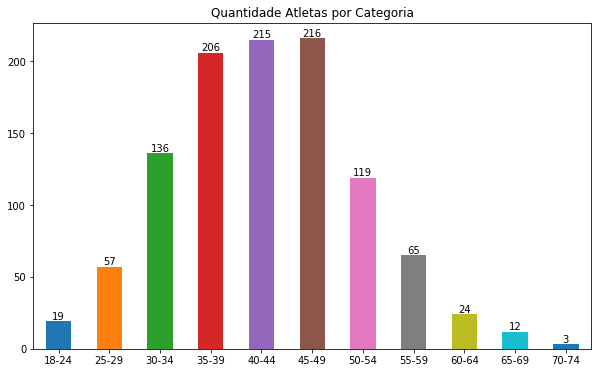

In [0]:
#categorias_excluidas = ['C','PRO']
#categorias = resultados[~resultados.isin(categorias_excluidas)] 
categorias = resultados
hist = categorias['Categ'].value_counts().sort_index(ascending=True).plot.bar(rot=0, title="Quantidade Atletas por Categoria", figsize=(10,6) )

rects = hist.patches

# Make labels
labels = [ i for i in categorias['Categ'].value_counts().sort_index(ascending=True) ]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    hist.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')

hist.patch.set_facecolor('#FFFFFF')

In [0]:
resultados.loc[resultados['Total'] < pd.to_datetime(target + ':00:00', format= '%H:%M:%S'), 'Abaixo' + target] = 'Abaixo ' + target + ' horas' 
resultados.loc[resultados['Total'] >= pd.to_datetime(target + ':00:00', format= '%H:%M:%S'), 'Abaixo' + target] = 'Acima ' + target + ' horas' 

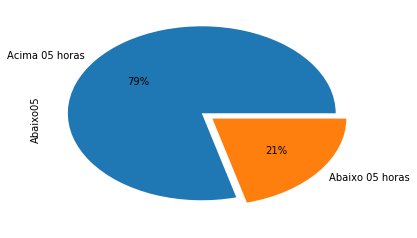

In [0]:
resultados['Abaixo' + target].value_counts().plot.pie(title='', explode=[0.1, 0], autopct='%1.0f%%');